<a href="https://colab.research.google.com/github/schenita/info5731/blob/master/SFloyd_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

In lesson 6, we talked about how to carry out emotion analysis with **NRC (National Research Council Canada) Emotion Lexicon**. In this assignment, you'll need to apply the similar approach on a different corpus, namely **Jane Austen's "Emma"**.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-26-09-37-39-732402.jpeg)


**Question 1. (20 points)** Load the sentences of Jane Austen's "Emma" as lists from NLTK **Gutenburg** corpus. In this Assignment, for simplicity, we regard each sentence as a "line" from the raw text. Print the first 20 sentences / lines.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-26-10-29-49-122343.jpeg)

In [62]:
import nltk
import re
nltk.download('punkt')
from urllib import request
from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk import sent_tokenize
url = "http://www.gutenberg.org/files/158/158-0.txt"
html = request.urlopen(url).read().decode('utf8')
raw = BeautifulSoup(html).get_text()
data = word_tokenize(raw)
tokenized_sents = [word_tokenize(i) for i in raw.split('\n')[30:90]]
for i in tokenized_sents:
  print (i)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[]
['EMMA']
[]
['By', 'Jane', 'Austen']
[]
[]
[]
[]
['VOLUME', 'I']
[]
[]
[]
['CHAPTER', 'I']
[]
[]
['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home']
['and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of']
['existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very']
['little', 'to', 'distress', 'or', 'vex', 'her', '.']
[]
['She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',']
['indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'s", 'marriage', ',', 'been']
['mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.', 'Her', 'mother', 'had', 'died']
['too', 'long', 'ago', 'for', 'her', 'to', 'have', '

**Question 2. (20 points)** Make a Pandas Dataframe `df`. It should contain two columns. One is the line number (named `line`, starting from 0), the other is the `word`. Convert all the words in lower cases, and get rid of all punctuations. Print the first 10 rows of `df`.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-26-10-30-21-041702.jpeg)

In [63]:
import pandas as pd
df = pd.DataFrame(data)
df = df.stack().reset_index(level=0)
df.columns = ['line', 'word']
df.head(10)

,line,word
0,0,﻿The
0,1,Project
0,2,Gutenberg
0,3,EBook
0,4,of
0,5,Emma
0,6,","
0,7,by
0,8,Jane
0,9,Austen


**Question 3. (20 points)** Load the data from the [NRC Emotion Lexicon](https://github.com/wshuyi/info-5731-public/raw/master/NRC_emotion_lexicon_list.txt) into a Pandas Dataframe `nrc`. Make the words as index, different emotions as column names, and fill in the values correspondingly. Print the first 5 rows of `nrc`.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-26-10-33-10-259893.jpeg)

In [26]:
!wget https://raw.githubusercontent.com/wshuyi/info-5731-public/master/NRC_emotion_lexicon_list.txt
nrc = pd.read_csv("NRC_emotion_lexicon_list.txt", sep='\t', header=None)
nrc.columns = ['word', 'emotion', 'value']
nrc = nrc.pivot(index='word',columns='emotion',values='value')
nrc.head()

--2019-03-05 03:01:52--  https://raw.githubusercontent.com/wshuyi/info-5731-public/master/NRC_emotion_lexicon_list.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2579144 (2.5M) [text/plain]
Saving to: ‘NRC_emotion_lexicon_list.txt.1’

NRC_emotion_lexicon 100%[===================>]   2.46M  --.-KB/s    in 0.06s   

2019-03-05 03:01:52 (41.2 MB/s) - ‘NRC_emotion_lexicon_list.txt.1’ saved [2579144/2579144]



emotion,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
word,,,,,,,,,,
NaN,0,0,0,0,0,0,0,0,0,0
aback,0,0,0,0,0,0,0,0,0,0
abacus,0,0,0,0,0,0,0,0,0,1
abandon,0,0,0,1,0,1,0,1,0,0
abandoned,1,0,0,1,0,1,0,1,0,0


**Question 4. (20 points)** Join `df` and `nrc` together. Sum the values of different emotions on each line, and put the result into a new Dataframe `new_df`. Print the first 5 rows of `new_df`.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-26-10-35-02-167561.jpeg)

In [31]:
new_df = df.join(nrc, how='left', on='word')
new_df.fillna(0, inplace=True)
result = new_df.drop(columns=['word']).groupby('line').sum()
result.head(10)

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
line,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Question 5. (20 points)** Make a plot of emotions "anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise" and "trust" from the first 500 lines. Put each emotion into a different **subplot**. All the subplots should share one single x axis.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-26-10-43-10-202460.png)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f85bd2220f0>,
      dtype=object)

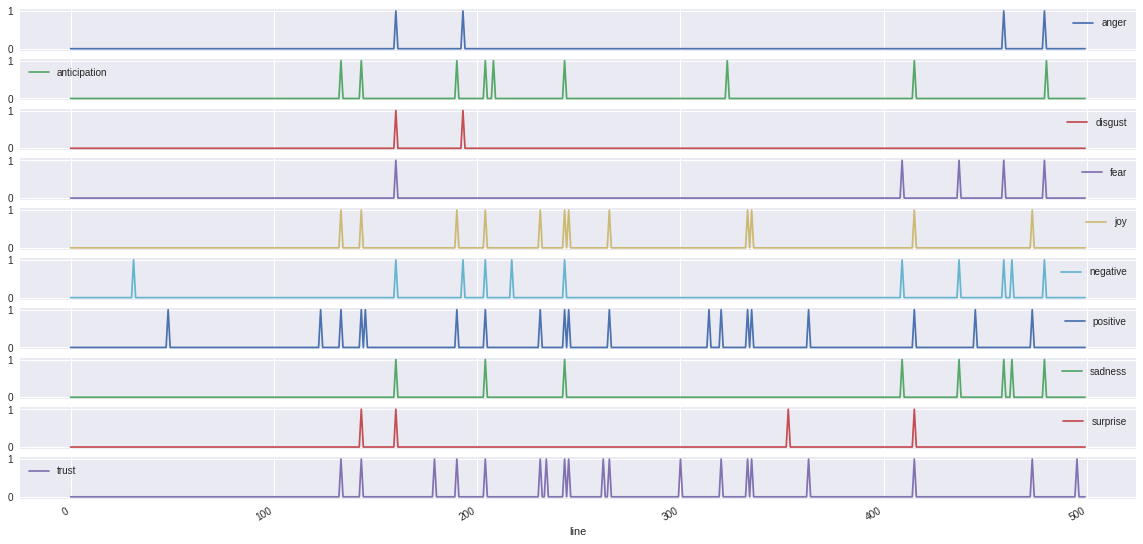

In [61]:
result500 = result.head(500)
result500.plot(subplots=True, figsize=(20, 10))